In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mfp_neutral_region_size = np.load('/lustre/aoc/projects/hera/wchin/mfp_neutral_region_size.npy')
mfp_size_probabilities = np.load('/lustre/aoc/projects/hera/wchin/mfp_size_probabilities.npy')

In [7]:
bin_num_mfp = int(1e3)
iteration_mfp = int(1e8)

## Vary: Rmax, EFF, constant: x_HI, z. x_HI error: 1e-2%

In [8]:
R_BUBBLE_MAXES = np.linspace(30, 0.225, 9)
HII_EFF_FACTORS = np.array(
    [19.04625, 
     19.511249999999997, 
     20.23875, 
     21.085, 
     22.655000000000012, 
     25.779375, 
     32.056640625, 
     56.6734375, 
     5291.5]
)
redshifts = np.array([6]*len(R_BUBBLE_MAXES))

total_neutral_fractions = np.array([0.19999881, 0.19998097, 0.20000417, 0.20001106, 0.19998624,
       0.20001978, 0.19999591, 0.19998911, 0.19998213])

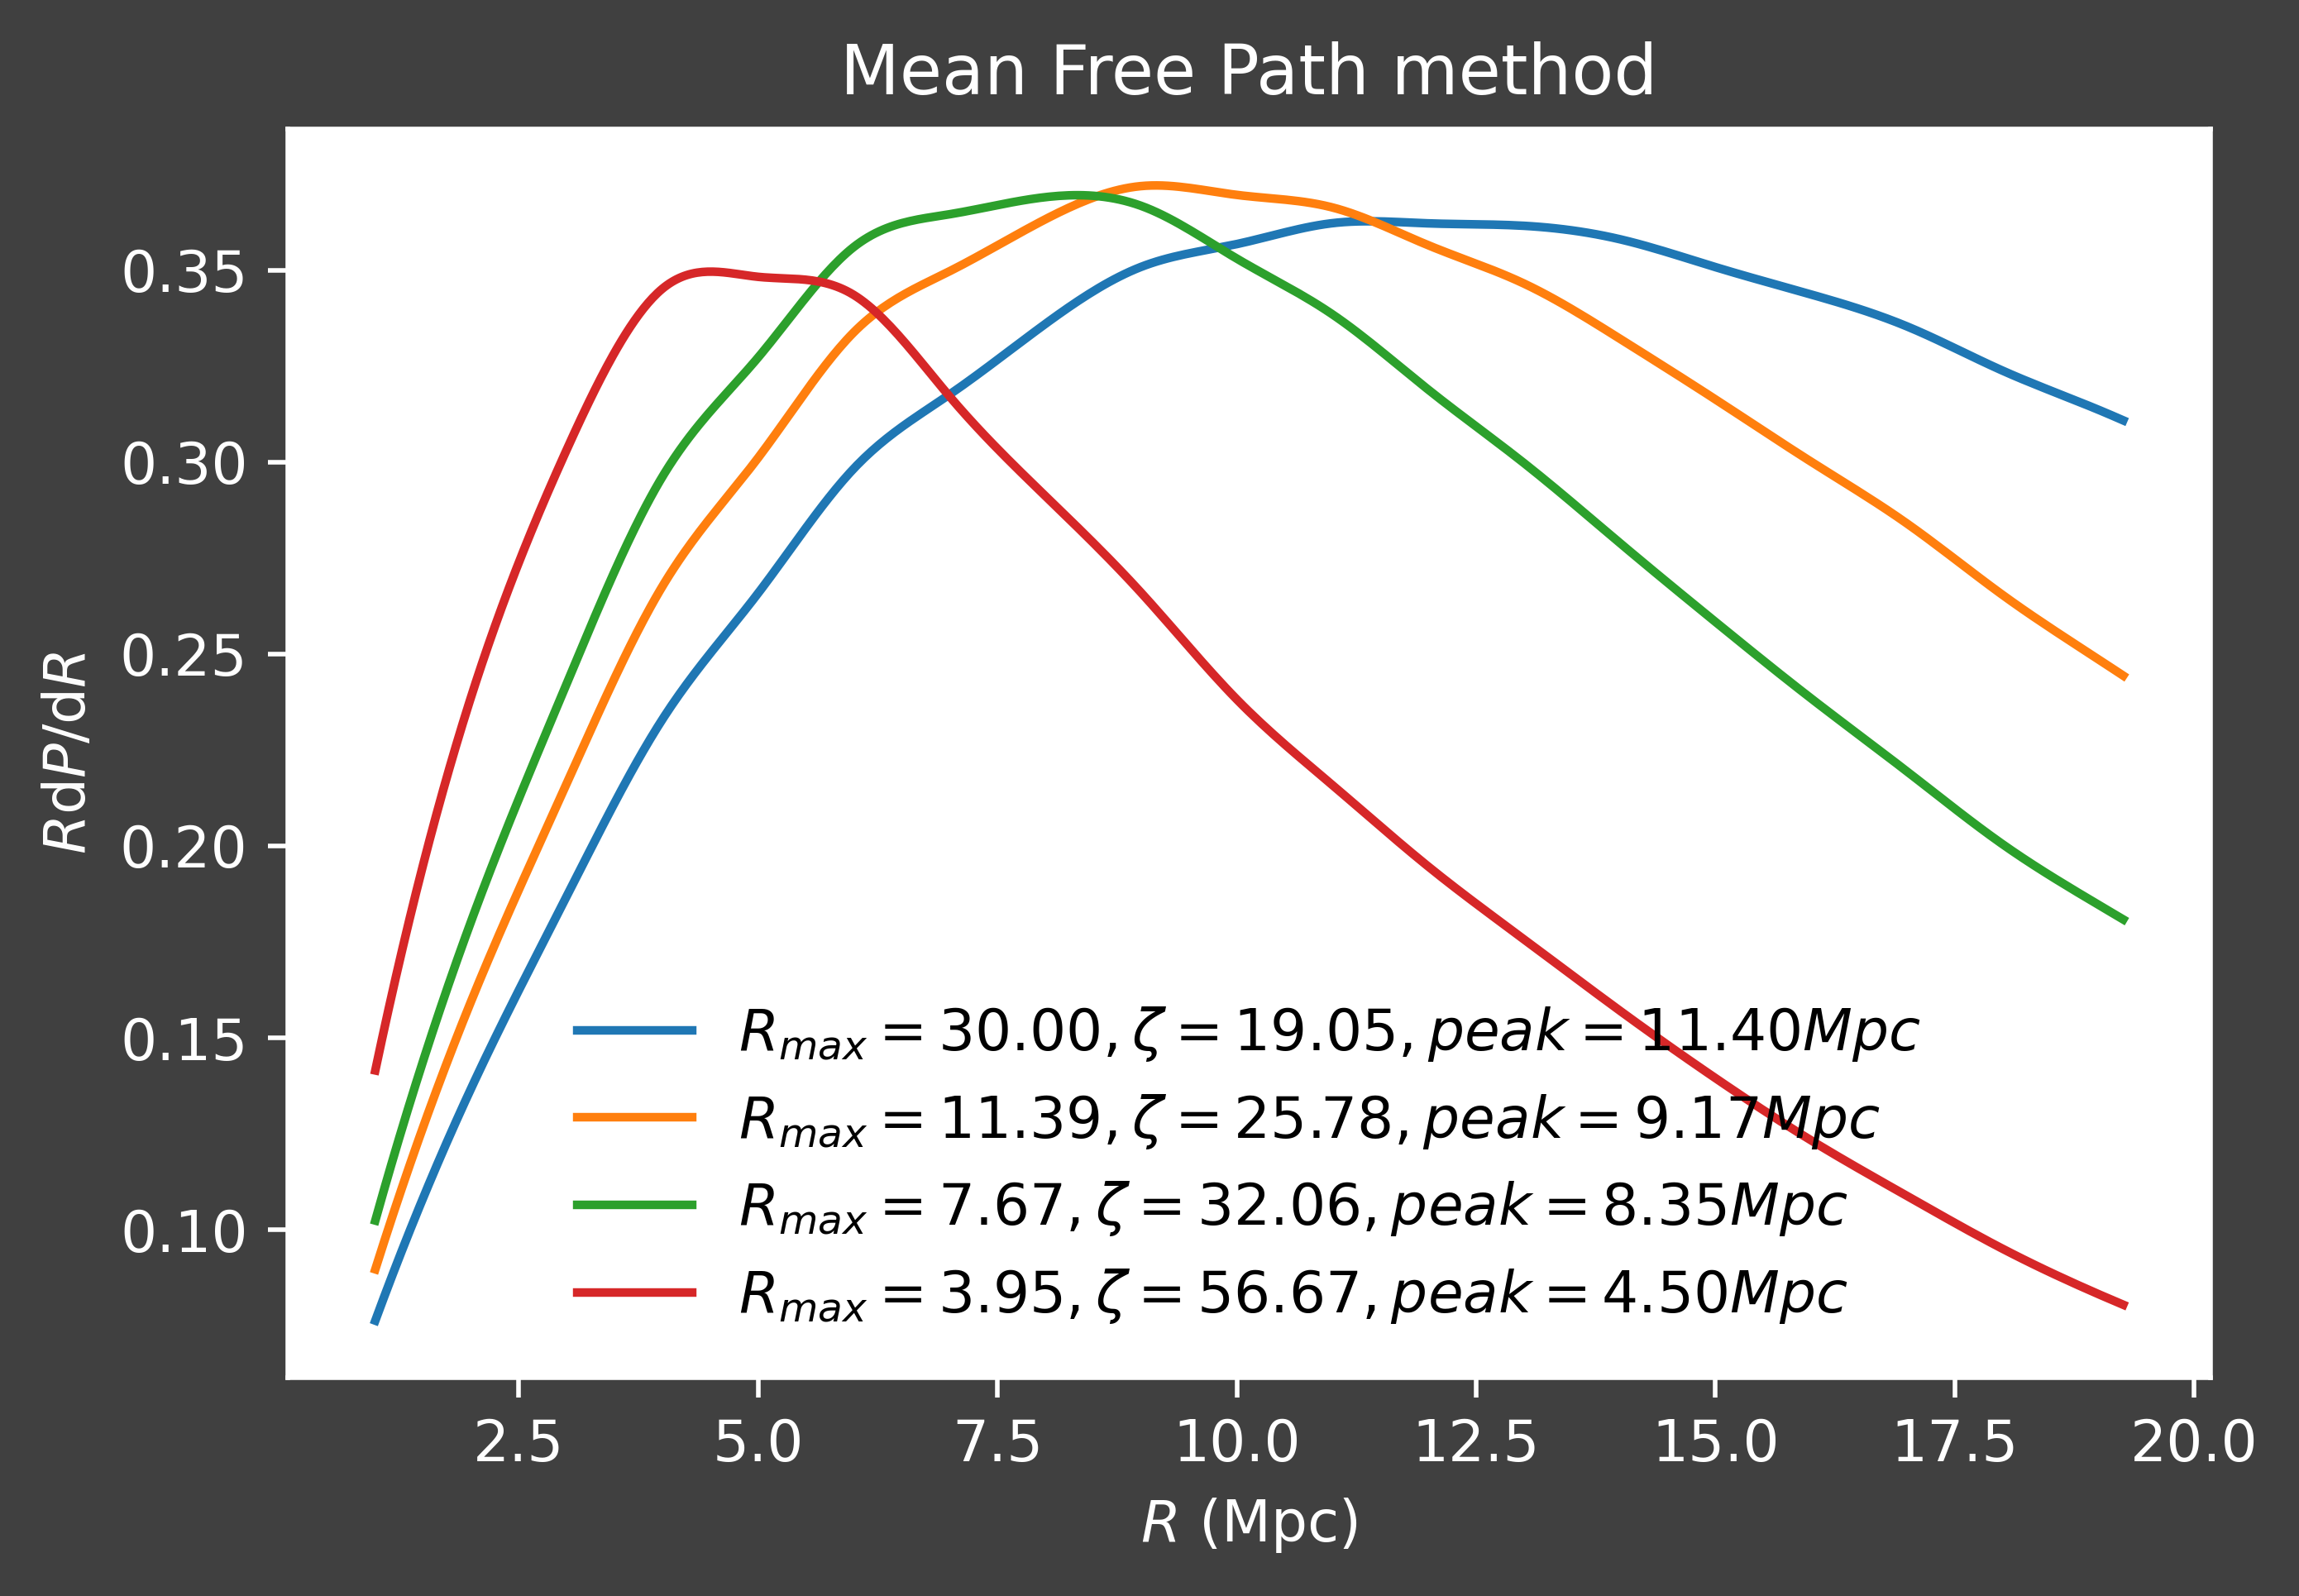

In [9]:
color='w'

percent=0.475

mfp_maxRs = np.zeros(len(mfp_size_probabilities))

fig = plt.figure(dpi=500, facecolor='#404040')
ax = fig.gca()
for spine in ax.spines.values():  # figure color
    spine.set_edgecolor(color)
    
for i in np.array([0, 5, 6, 7]):
    
    mfp_maxRs[i] = mfp_neutral_region_size[np.argmax(mfp_size_probabilities[i])]
    
    plt.plot(
        mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
        mfp_size_probabilities[i][:int(percent*bin_num_mfp)], 
        '-',
        label=f'$R_{{max}}={R_BUBBLE_MAXES[i]:.2f}, \zeta={HII_EFF_FACTORS[i]:.2f}, \
peak={mfp_maxRs[i]:.2f}Mpc$'
    )
plt.legend(fancybox=True, framealpha=0)
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'Mean Free Path method', color=color)
# plt.rcParams['font.size'] = font
# plt.yscale('log')
plt.show()

In [ ]:
color='white'
percent=0.475

mfp_maxRs = np.zeros(len(mfp_size_probabilities))

plt.rcParams['figure.figsize'] = [10, 6]
for i, mfp_size_probability in enumerate(mfp_size_probabilities):
    
    mfp_maxRs[i] = mfp_neutral_region_size[np.argmax(mfp_size_probability)]
    
    plt.plot(
        mfp_neutral_region_size[:int(percent*bin_num_mfp)], 
        mfp_size_probability[:int(percent*bin_num_mfp)], 
        '-',
        label=f'Rmax={R_BUBBLE_MAXES[i]:.2f}, EFF={HII_EFF_FACTORS[i]:.2f}, \
x_HI={total_neutral_fractions[i]*100:.1f}%, \
maxR={mfp_maxRs[i]:.2f}'
    )
plt.legend(prop={'size': 15}, fancybox=True, framealpha=0)
plt.tick_params(color=color, labelcolor=color)
plt.xlabel('$R$ (Mpc)', color=color)
plt.ylabel('$R\mathrm{d}P/\mathrm{d}R$', color=color)
plt.title(f'Our Boxes, MFP method: Vary: Rmax, EFF, constant: x_HI, z={redshifts[0]} ({iteration_mfp:.0e} iterations)', color=color)
# plt.rcParams['font.size'] = 18
# plt.yscale('log')